# Explore here

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from sklearn.impute import KNNImputer
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from lazypredict.Supervised import LazyRegressor

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.68,-73.95,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70,-73.93,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81,-73.95,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.76,-73.99,Shared room,55,1,0,NaN,NaN,6,2


In [25]:
df.shape

(48895, 16)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [27]:
df.drop(['name', 'host_id', 'host_name'], axis=1, inplace= True)

In [28]:
cont_unique = df.nunique()
cont_unique

id                                48895
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [29]:
df.duplicated().sum()

0

In [30]:
df.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00,38843.00,48895.00,48895.00
mean,19017143.24,40.73,-73.95,152.72,7.03,23.27,1.37,7.14,112.78
std,10983108.39,0.05,0.05,240.15,20.51,44.55,1.68,32.95,131.62
min,2539.00,40.50,-74.24,0.00,1.00,0.00,0.01,1.00,0.00
25%,9471945.00,40.69,-73.98,69.00,1.00,1.00,0.19,1.00,0.00
50%,19677284.00,40.72,-73.96,106.00,3.00,5.00,0.72,1.00,45.00
75%,29152178.50,40.76,-73.94,175.00,5.00,24.00,2.02,2.00,227.00
max,36487245.00,40.91,-73.71,10000.00,1250.00,629.00,58.50,327.00,365.00


In [31]:
np.where(df.price == 0)

(array([23161, 25433, 25634, 25753, 25778, 25794, 25795, 25796, 26259,
        26841, 26866]),)

In [32]:
df.drop([23161, 25433, 25634, 25753, 25778, 25794, 25795, 25796, 26259, 26841, 26866], axis=0, inplace=True)

In [33]:
df.shape

(48884, 13)

In [34]:
df.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48884.00,48884.00,48884.00,48884.00,48884.00,48884.00,38833.00,48884.00,48884.00
mean,19016793.41,40.73,-73.95,152.76,7.03,23.27,1.37,7.14,112.78
std,10984315.04,0.05,0.05,240.17,20.51,44.55,1.68,32.96,131.63
min,2539.00,40.50,-74.24,10.00,1.00,0.00,0.01,1.00,0.00
25%,9470547.50,40.69,-73.98,69.00,1.00,1.00,0.19,1.00,0.00
50%,19675740.50,40.72,-73.96,106.00,3.00,5.00,0.72,1.00,45.00
75%,29152966.75,40.76,-73.94,175.00,5.00,24.00,2.02,2.00,227.00
max,36487245.00,40.91,-73.71,10000.00,1250.00,629.00,58.50,327.00,365.00


In [35]:
y = df.price.values
y

array([149, 225, 150, ..., 115,  55,  90])

(array([4.7847e+04, 7.9900e+02, 9.9000e+01, 5.3000e+01, 2.0000e+01,
        2.1000e+01, 2.0000e+00, 1.1000e+01, 6.0000e+00, 6.0000e+00,
        2.0000e+00, 2.0000e+00, 4.0000e+00, 1.0000e+00, 2.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+00]),
 array([   10. ,   509.5,  1009. ,  1508.5,  2008. ,  2507.5,  3007. ,
         3506.5,  4006. ,  4505.5,  5005. ,  5504.5,  6004. ,  6503.5,
         7003. ,  7502.5,  8002. ,  8501.5,  9001. ,  9500.5, 10000. ]),
 <BarContainer object of 20 artists>)

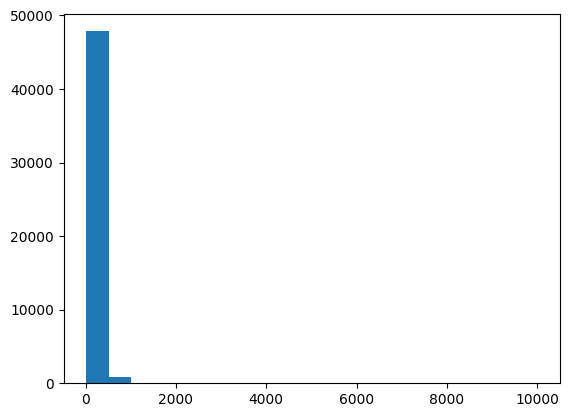

In [36]:
plt.hist(y, bins=20)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f94746ea1d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f94746eb5d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9471421e50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f94746a0490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f94746a0cd0>],
 'means': []}

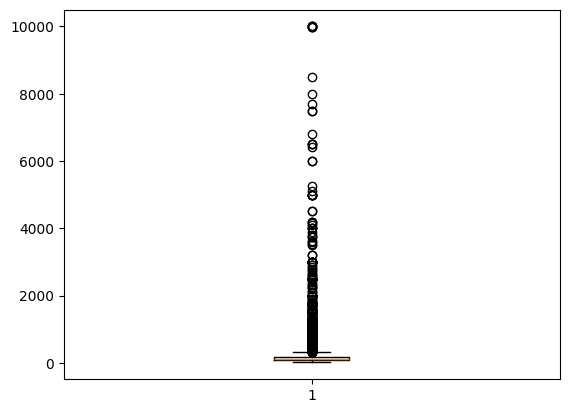

In [37]:
plt.boxplot(y)

In [38]:
df['LOG_PRICE'] = np.log(df.price)

[]

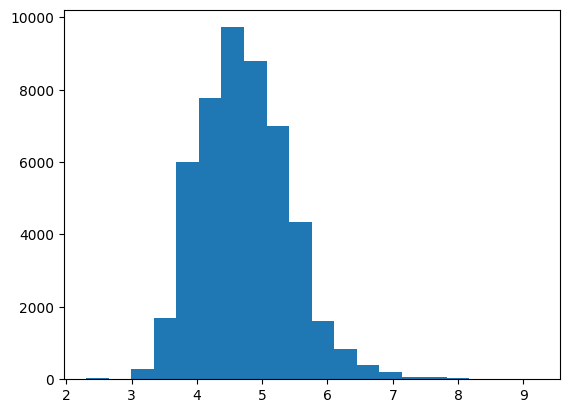

In [39]:
plt.hist(df['LOG_PRICE'], bins=20)
plt.plot()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9474319890>,
 'caps': [<matplotlib.lines.Line2D at 0x7f947431ab50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9474319150>],
 'medians': [<matplotlib.lines.Line2D at 0x7f947431b990>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9471d68150>],
 'means': []}

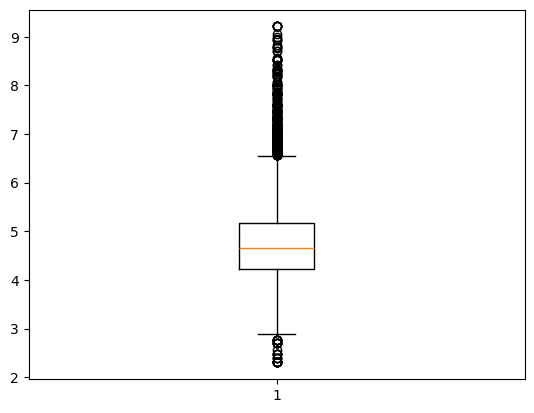

In [40]:
plt.boxplot(df.LOG_PRICE)

In [41]:
df.isna().mean()*100

id                                0.00
neighbourhood_group               0.00
neighbourhood                     0.00
latitude                          0.00
longitude                         0.00
room_type                         0.00
price                             0.00
minimum_nights                    0.00
number_of_reviews                 0.00
last_review                      20.56
reviews_per_month                20.56
calculated_host_listings_count    0.00
availability_365                  0.00
LOG_PRICE                         0.00
dtype: float64

In [42]:
df.isnull().any(axis=1).sum()/len(df)*100

20.56091972833647

<Axes: >

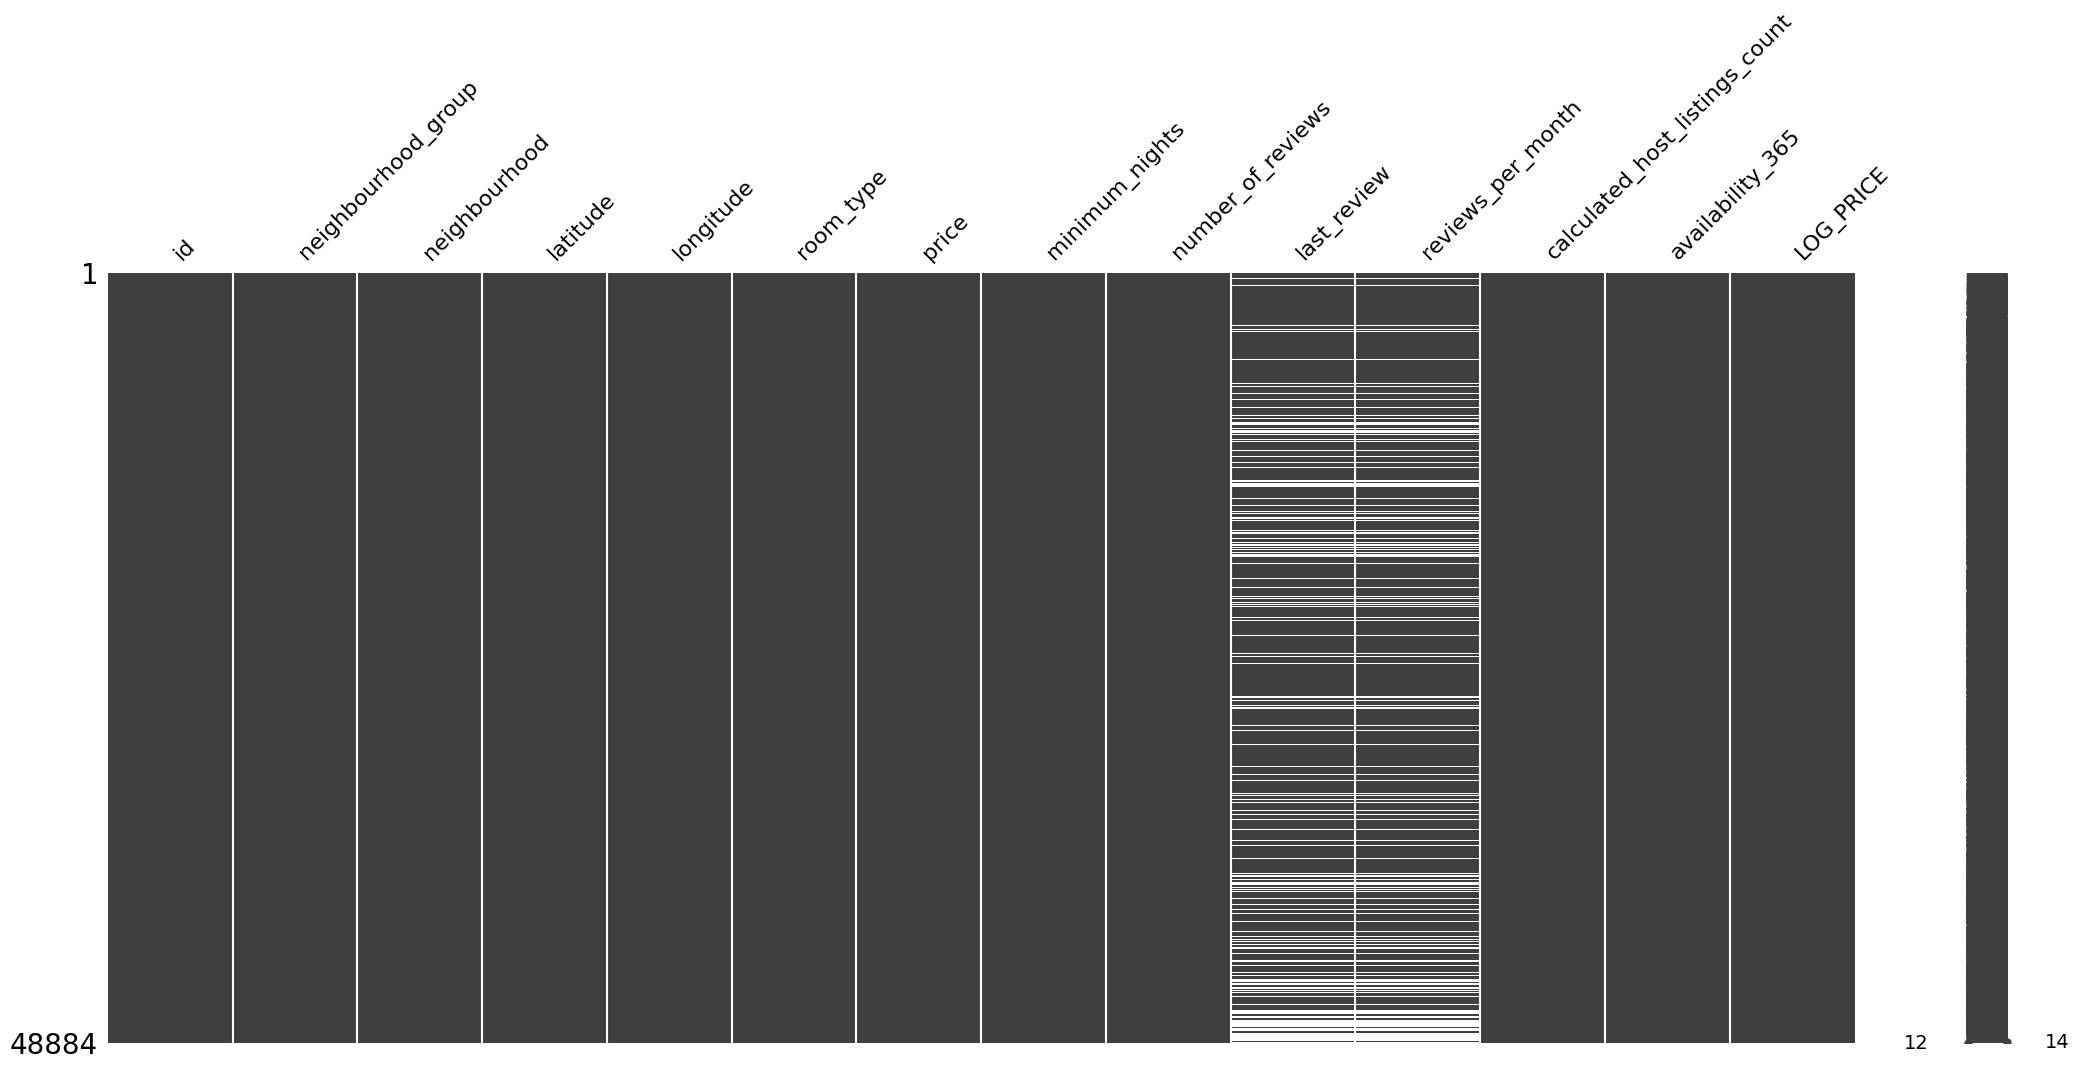

In [43]:
msno.matrix(df)

In [44]:
df[['last_review','reviews_per_month']]

,last_review,reviews_per_month
0,2018-10-19,0.21
1,2019-05-21,0.38
2,NaN,NaN
3,2019-07-05,4.64
4,2018-11-19,0.10
...,...,...
48890,NaN,NaN
48891,NaN,NaN
48892,NaN,NaN
48893,NaN,NaN


In [45]:
df.reviews_per_month.fillna(0, inplace= True)

df[['last_review','reviews_per_month']]

,last_review,reviews_per_month
0,2018-10-19,0.21
1,2019-05-21,0.38
2,NaN,0.00
3,2019-07-05,4.64
4,2018-11-19,0.10
...,...,...
48890,NaN,0.00
48891,NaN,0.00
48892,NaN,0.00
48893,NaN,0.00


In [46]:
df.last_review.fillna(0, inplace= True)  
df.last_review

0        2018-10-19
1        2019-05-21
2                 0
3        2019-07-05
4        2018-11-19
            ...    
48890             0
48891             0
48892             0
48893             0
48894             0
Name: last_review, Length: 48884, dtype: object

In [47]:
df.last_review.fillna(0, inplace=True)

ls = []

for i in df.last_review:
    if i !=0:
        ls.append(1)
    else:
        ls.append(0)

df.last_review = ls

df.last_review

0        1
1        1
2        0
3        1
4        1
        ..
48890    0
48891    0
48892    0
48893    0
48894    0
Name: last_review, Length: 48884, dtype: int64

<Axes: >

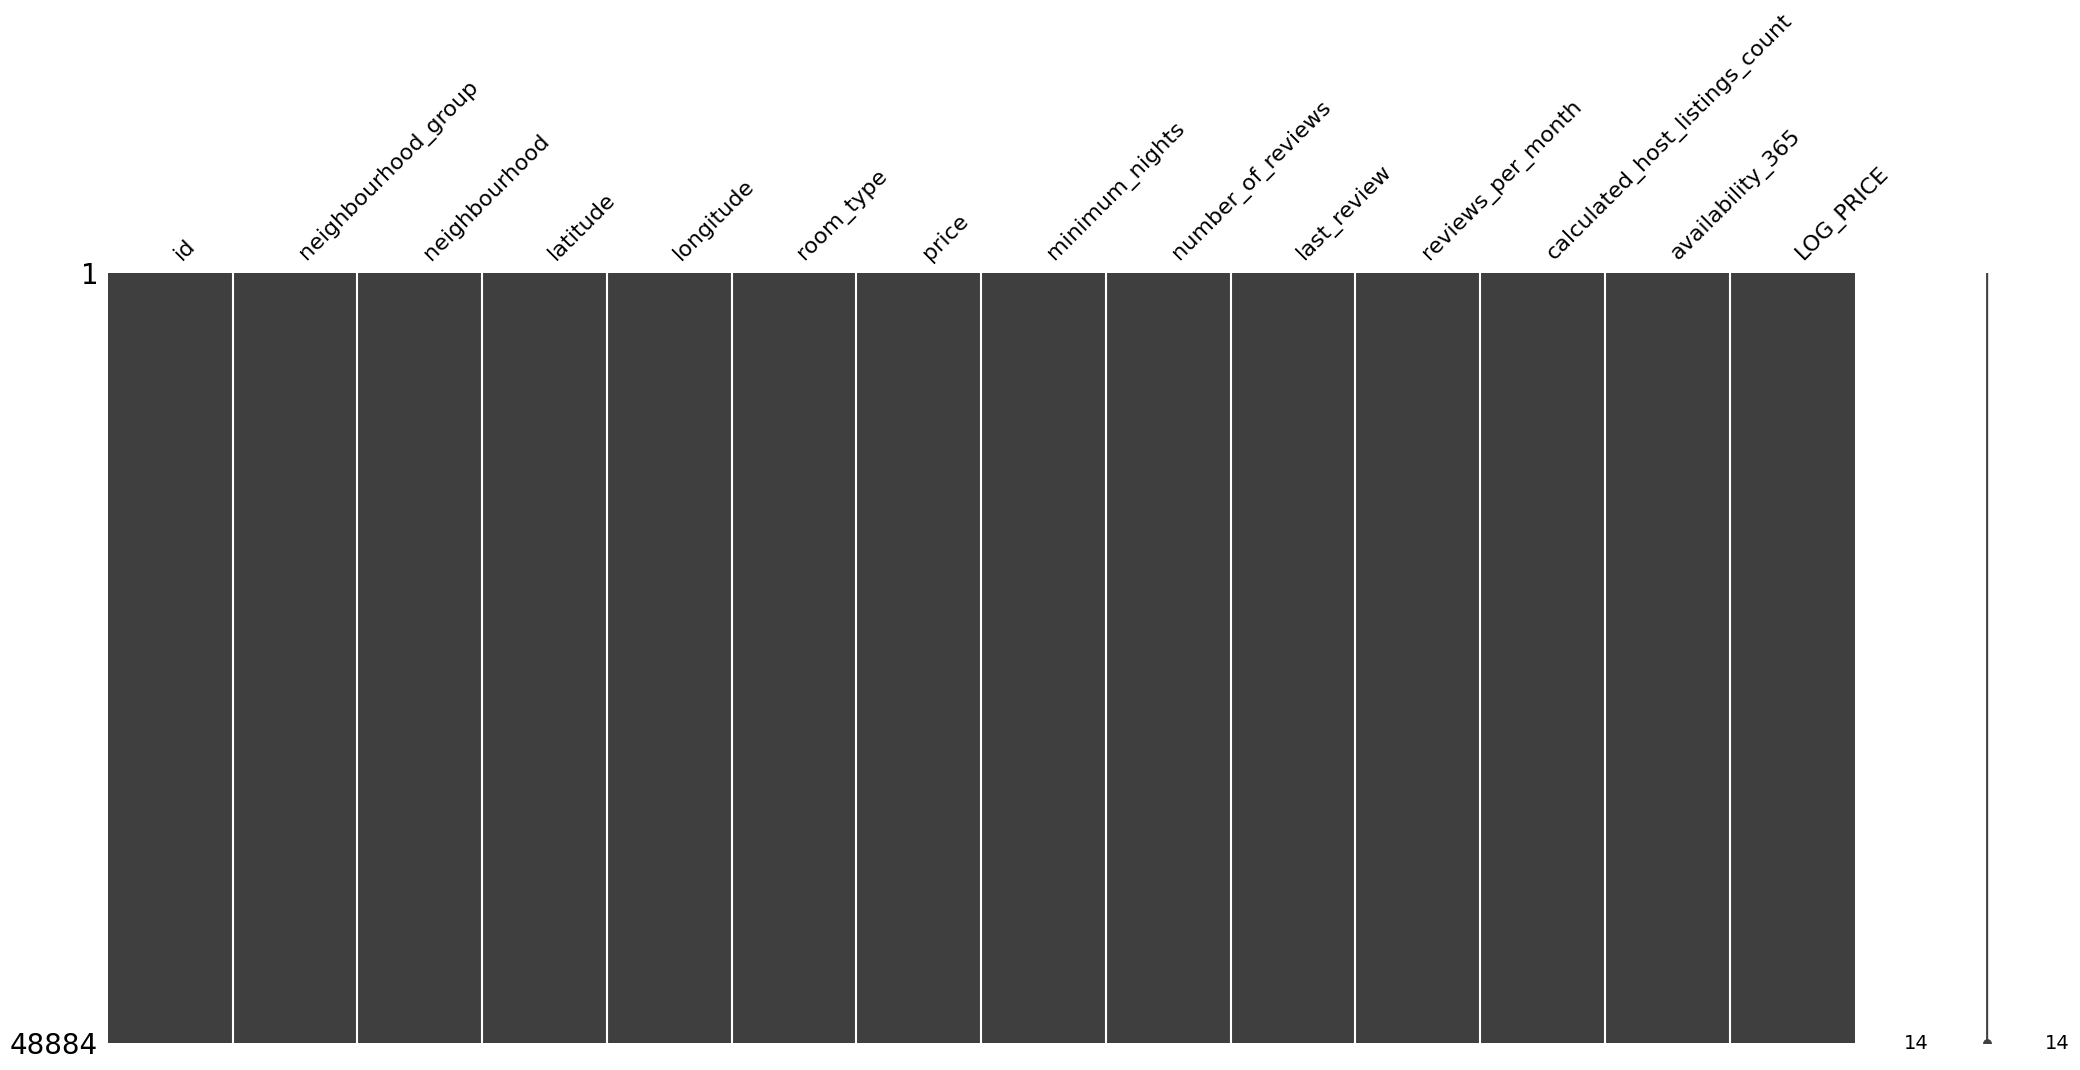

In [48]:
msno.matrix(df)

In [49]:
df.isna().sum()

id                                0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
LOG_PRICE                         0
dtype: int64

In [55]:
df = pd.get_dummies(df, drop_first=True)

In [56]:
X = df.drop(['price','LOG_PRICE'], axis=1)
y = df['LOG_PRICE']

In [57]:
X.dtypes

id                             int64
latitude                     float64
longitude                    float64
minimum_nights                 int64
number_of_reviews              int64
                              ...   
neighbourhood_Woodrow           bool
neighbourhood_Woodside          bool
room_type_Entire home/apt       bool
room_type_Private room          bool
room_type_Shared room           bool
Length: 238, dtype: object

In [53]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [54]:
X

,const,id,latitude,longitude,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,...,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,1.00,2539,40.65,-73.97,1,9,1,0.21,6,365,...,False,False,False,False,False,False,False,False,True,False
1,1.00,2595,40.75,-73.98,1,45,1,0.38,2,355,...,False,False,False,False,False,False,False,True,False,False
2,1.00,3647,40.81,-73.94,3,0,0,0.00,1,365,...,False,False,False,False,False,False,False,False,True,False
3,1.00,3831,40.69,-73.96,1,270,1,4.64,1,194,...,False,False,False,False,False,False,False,True,False,False
4,1.00,5022,40.80,-73.94,10,9,1,0.10,1,0,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,1.00,36484665,40.68,-73.95,2,0,0,0.00,2,9,...,False,False,False,False,False,False,False,False,True,False
48891,1.00,36485057,40.70,-73.93,4,0,0,0.00,2,36,...,False,False,False,False,False,False,False,False,True,False
48892,1.00,36485431,40.81,-73.95,10,0,0,0.00,1,27,...,False,False,False,False,False,False,False,True,False,False
48893,1.00,36485609,40.76,-73.99,1,0,0,0.00,6,2,...,False,False,False,False,False,False,False,False,False,True


In [13]:
model = sm.OLS(y, X.values).fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [126]:
cook_distance = model.get_influence().cooks_distance[0]
plt.scatter(df.price, cook_distance)
plt.show()

NameError: name 'model' is not defined

NameError: name 'model' is not defined